In [2]:
from fonctions import *

In [16]:
# récupération des articles et des tags

dic = lire_json("articlesTags_Stanford.json")

new_dic = reorganiser_POS(dic)

# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

# Vectorisation des documents et création du model

X, V = creer_X(liste_tags, 2, 3)

In [17]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 

In [ ]:
# calcul de la distance entre les vecteurs de chaque clusters
# 2 mesures : distortion et inertie
# voir : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

distortions = [] 
inertias = []  
K = range(1, 10)

for k in K: # test en allant de 1 à 9 clusters
    kmeanModel = creer_model_KM(k, X)
    
    print(effectifs_clusters(kmeanModel))

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                    'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

{0: 5685}
{1: 1893, 0: 3792}
{1: 1639, 0: 1028, 2: 3018}
{1: 1354, 2: 887, 0: 2438, 3: 1006}
{4: 955, 2: 783, 3: 844, 1: 2206, 0: 897}
{0: 486, 4: 849, 3: 708, 1: 2117, 2: 824, 5: 701}
{5: 467, 1: 739, 6: 650, 0: 2041, 2: 790, 3: 512, 4: 486}
{4: 471, 6: 608, 2: 642, 0: 1887, 1: 539, 5: 619, 3: 459, 7: 460}


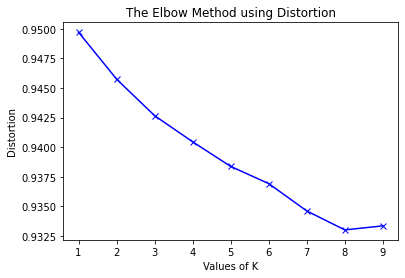

In [14]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

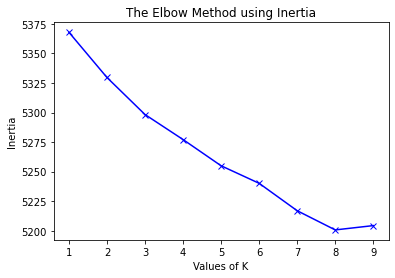

In [15]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()